![BTS](img/Logo-BTS.jpg)

# Session 5: Text Mining (I)

### Juan Luis Cano Rodríguez <juan.cano@bts.tech> - Data Science Foundations (2018-10-19)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Juanlu001/bts-mbds-data-science-foundations/blob/master/sessions/05-Text-Mining-I.ipynb)

In [1]:
import pandas as pd
import spacy

In [2]:
import sys
!{sys.executable} -m spacy download en


    Linking successful
    /home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/en_core_web_sm
    -->
    /home/juanlu/.miniconda36/envs/bts36/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



## Introduction

![Pipeline](img/pipelines.png)

## Word and sentence tokenization

In [3]:
nlp = spacy.load("en")

In [4]:
text1 = "This is a happy sentence by Michael O'Leary."
doc = nlp(text1)

In [6]:
doc

This is a happy sentence by Michael O'Leary.

In [7]:
type(doc)

spacy.tokens.doc.Doc

In [8]:
for token in doc:
    print(token)

This
is
a
happy
sentence
by
Michael
O'Leary
.


In [30]:
doc[0].is_alpha

True

In [20]:
doc[0].is_lower

False

In [21]:
doc[0].is_currency

False

In [18]:
doc[-1].is_punct

True

In [31]:
text2 = 'Some\nspaces  and\ttab characters'
print(text2)

Some
spaces  and	tab characters


In [33]:
token.is_space

False

In [34]:
nlp(text2)[1].is_space

True

In [32]:
for token in nlp(text2):
    print(token)

Some


spaces
 
and
	
tab
characters


In [121]:
text3 = "In ancient Rome, some neighbors live in three adjacent houses. In the center is the house of Senex, who lives there with wife Domina, son Hero, and several slaves, including head slave Hysterium and the musical's main character Pseudolus. A slave belonging to Hero, Pseudolus wishes to buy, win, or steal his freedom. One of the neighboring houses is owned by Marcus Lycus, who is a buyer and seller of beautiful women; the other belongs to the ancient Erronius, who is abroad searching for his long-lost children (stolen in infancy by pirates). One day, Senex and Domina go on a trip and leave Pseudolus in charge of Hero. Hero confides in Pseudolus that he is in love with the lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin)."
doc = nlp(text3)

In [122]:
for sent in doc.sents:
    print(sent)

In ancient Rome, some neighbors live in three adjacent houses.
In the center is the house of Senex, who lives there with wife Domina, son Hero, and several slaves, including head slave Hysterium and the musical's main character Pseudolus.
A slave belonging to Hero, Pseudolus wishes to buy, win, or steal his freedom.
One of the neighboring houses is owned by Marcus Lycus, who is a buyer and seller of beautiful women; the other belongs to the ancient Erronius, who is abroad searching for his long-lost children (stolen in infancy by pirates).
One day, Senex and Domina go on a trip and leave Pseudolus in charge of Hero.
Hero confides in Pseudolus that he is in love with the lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin).


## Lemmatization

In [64]:
nlp("they are neighbours")[-1].lemma_

'neighbour'

In [54]:
doc = nlp(text3)
doc

In ancient Rome.com, some neighbors live in three adjacent houses. In the center is the house of Senex, who lives there with wife Domina, son Hero, and several slaves, including head slave Hysterium and the musical's main character Pseudolus. A slave belonging to Hero, Pseudolus wishes to buy, win, or steal his freedom. One of the neighboring houses is owned by Marcus Lycus, who is a buyer and seller of beautiful women; the other belongs to the ancient Erronius, who is abroad searching for his long-lost children (stolen in infancy by pirates). One day, Senex and Domina go on a trip and leave Pseudolus in charge of Hero. Hero confides in Pseudolus that he is in love with the lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin).

In [71]:
doc[7]

in

In [75]:
doc[0]

In

In [78]:
doc[0].lemma_

'in'

In [84]:
"hello".lemma_

AttributeError: 'str' object has no attribute 'lemma_'

In [85]:
doc[0]

In

In [86]:
type(_)

spacy.tokens.token.Token

In [89]:
doc.vocab['is']

In [83]:
doc[0].lower_ in STOP_WORDS 

True

In [82]:
_.lower_

'in'

In [76]:
doc[0].is_stop

False

In [72]:
doc[7].is_stop

True

In [77]:
'in' in STOP_WORDS

True

In [65]:
from spacy.lang.en.stop_words import STOP_WORDS

print(STOP_WORDS)

{'others', 'along', 'am', 'everywhere', 'elsewhere', 'were', 'forty', 'for', 'go', 'when', 'herself', 'has', 'not', 'all', 'sometime', 'does', 'indeed', 'into', 'next', 'seems', 'whenever', 'where', 'nor', 'perhaps', 'could', 'many', 'on', 'else', 'through', 'whether', 'while', 'anyone', 'cannot', 'whereby', 'both', 'any', 'part', 'own', 'might', 'we', 'few', 'another', 'either', 'but', 'latterly', 'per', 'upon', 'your', 'hereafter', 'anyhow', 'his', 'off', 'us', 'no', 'each', 'call', 'front', 'how', 'hundred', 'him', 'during', 'give', 'formerly', 'someone', 'thus', 'will', 'myself', 'alone', 'she', 'they', 'least', 'twelve', 'yours', 'much', 'still', 'must', 'already', 'its', 'across', 'latter', 'within', 'besides', 'wherein', 'these', 'becomes', 'below', 'doing', 're', 'out', 'take', 'via', 'onto', 'very', 'except', 'in', 'a', 'seem', 'seemed', 'unless', 'by', 'do', 'anyway', 'nevertheless', 'up', 'get', 'otherwise', 'first', 'whatever', 'fifteen', 'should', 'those', 'third', 'none',

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

print(STOP_WORDS)

In [63]:
[token.lemma_ for token in doc if not token.is_punct]

['in',
 'ancient',
 'rome.com',
 'some',
 'neighbor',
 'live',
 'in',
 'three',
 'adjacent',
 'house',
 'in',
 'the',
 'center',
 'be',
 'the',
 'house',
 'of',
 'senex',
 'who',
 'live',
 'there',
 'with',
 'wife',
 'domina',
 'son',
 'hero',
 'and',
 'several',
 'slave',
 'include',
 'head',
 'slave',
 'hysterium',
 'and',
 'the',
 'musical',
 "'s",
 'main',
 'character',
 'pseudolus',
 'a',
 'slave',
 'belong',
 'to',
 'hero',
 'pseudolus',
 'wish',
 'to',
 'buy',
 'win',
 'or',
 'steal',
 '-PRON-',
 'freedom',
 'one',
 'of',
 'the',
 'neighbor',
 'house',
 'be',
 'own',
 'by',
 'marcus',
 'lycus',
 'who',
 'be',
 'a',
 'buyer',
 'and',
 'seller',
 'of',
 'beautiful',
 'woman',
 'the',
 'other',
 'belong',
 'to',
 'the',
 'ancient',
 'erronius',
 'who',
 'be',
 'abroad',
 'search',
 'for',
 '-PRON-',
 'long',
 'lose',
 'child',
 'steal',
 'in',
 'infancy',
 'by',
 'pirate',
 'one',
 'day',
 'senex',
 'and',
 'domina',
 'go',
 'on',
 'a',
 'trip',
 'and',
 'leave',
 'pseudolus',
 'in

In [61]:
doc[15].lemma_

'be'

In [56]:
doc[5].lemma_

'neighbor'

## Part-of-speech tagging

All tags recognized by spaCy are listed at https://spacy.io/api/annotation#pos-tagging.

In [91]:
doc = nlp(text1)
doc

This is a happy sentence by Michael O'Leary.

In [92]:
for token in doc:
    print(token, token.pos_)

This DET
is VERB
a DET
happy ADJ
sentence NOUN
by ADP
Michael PROPN
O'Leary PROPN
. PUNCT


In [96]:
nlp_es = spacy.load("es")
displacy.render(nlp_es("¡Bienvenidos al curso de Python!"), style="dep", jupyter=True)

In [93]:
from spacy import displacy

In [94]:
displacy.render(doc, style="dep", jupyter=True)

### Task: Information table

Display a table with all the tokens of `text1` and the columns `["Text", "Lemma", "Coarse POS (pos)", "Fine POS (tag)", "Syntactic dependency", "Shape", "Alphanumeric", "Stop"]`. Look in https://spacy.io/api/token#attributes for hints. Something like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Text</th>
      <th>Lemma</th>
      <th>Coarse POS (pos)</th>
      <th>Fine POS (tag)</th>
      <th>Syntactic dependency</th>
      <th>Shape</th>
      <th>Alphanumeric</th>
      <th>Stop</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>This</td>
      <td>this</td>
      <td>DET</td>
      <td>DT</td>
      <td>nsubj</td>
      <td>Xxxx</td>
      <td>True</td>
      <td>False</td>
    </tr>
    <tr>
      <th>1</th>
      <td>is</td>
      <td>be</td>
      <td>VERB</td>
      <td>VBZ</td>
      <td>ROOT</td>
      <td>xx</td>
      <td>True</td>
      <td>True</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
  </tbody>
</table>

In [98]:
pd.DataFrame(columns=["Text", "Lemma", "Coarse POS (pos)", "Fine POS (tag)", "Syntactic dependency", "Shape", "Alphanumeric", "Stop"])

,Text,Lemma,Coarse POS (pos),Fine POS (tag),Syntactic dependency,Shape,Alphanumeric,Stop


In [109]:
doc = nlp(text1)

rows = []
for token in doc:
    rows.append((token.text, token.lemma_, token.pos_, token.tag_,
                 token.dep_, token.shape_, token.is_alpha, token.is_stop))

pd.DataFrame(
    rows,
    columns=["Text", "Lemma", "Coarse POS (pos)", "Fine POS (tag)", "Syntactic dependency", "Shape", "Alphanumeric", "Stop"]
)

,Text,Lemma,Coarse POS (pos),Fine POS (tag),Syntactic dependency,Shape,Alphanumeric,Stop
0,This,this,DET,DT,nsubj,Xxxx,True,False
1,is,be,VERB,VBZ,ROOT,xx,True,True
2,a,a,DET,DT,det,x,True,True
3,happy,happy,ADJ,JJ,amod,xxxx,True,False
4,sentence,sentence,NOUN,NN,attr,xxxx,True,False
5,by,by,ADP,IN,prep,xx,True,True
6,Michael,michael,PROPN,NNP,compound,Xxxxx,True,False
7,O'Leary,o'leary,PROPN,NNP,pobj,X'Xxxxx,False,False
8,.,.,PUNCT,.,punct,.,False,False


In [104]:
from collections import defaultdict

In [106]:
doc = nlp(text1)

rows = defaultdict(list)

for token in doc:
    rows["Text"].append(token.text)
    rows["Lemma"].append(token.lemma_)

pd.DataFrame(rows)

,Text,Lemma
0,This,this
1,is,be
2,a,a
3,happy,happy
4,sentence,sentence
5,by,by
6,Michael,michael
7,O'Leary,o'leary
8,.,.


In [101]:
pd.DataFrame(
    rows,
    columns=["Text", "Lemma", "Coarse POS (pos)", "Fine POS (tag)", "Syntactic dependency", "Shape", "Alphanumeric", "Stop"]
)

,Text,Lemma,Coarse POS (pos),Fine POS (tag),Syntactic dependency,Shape,Alphanumeric,Stop
0,This,this,DET,DT,nsubj,Xxxx,True,False
1,is,be,VERB,VBZ,ROOT,xx,True,True
2,a,a,DET,DT,det,x,True,True
3,happy,happy,ADJ,JJ,amod,xxxx,True,False
4,sentence,sentence,NOUN,NN,attr,xxxx,True,False
5,by,by,ADP,IN,prep,xx,True,True
6,Michael,michael,PROPN,NNP,compound,Xxxxx,True,False
7,O'Leary,o'leary,PROPN,NNP,pobj,X'Xxxxx,False,False
8,.,.,PUNCT,.,punct,.,False,False


## Entity recognition

https://spacy.io/api/annotation#named-entities

In [117]:
text4 = u'Apple is looking at buying U.K. startup for 1 billion USD'
doc = nlp(text4)

In [118]:
for ent in doc.ents:
    print(ent, ent.label_)

Apple ORG
U.K. GPE
1 billion USD MONEY


In [123]:
doc3 = nlp(text3)

displacy.render(doc3, style="ent", jupyter=True)

## Vocabularies

* `Vocab` objects contain a set of look-up tables that make common information available across documents.
* Indexing the `Vocab` retrieves a `Lexeme`, which contains all the context-independent information about a word.

![Vocabularies](img/vocab.png)

In [135]:
nlp.vocab

In [134]:
doc3.vocab["Madrid"]

In [127]:
lex = doc3.vocab["Rome"]
lex

In [132]:
lex.shape_

'Xxxx'

In [128]:
lex.text

'Rome'

In [131]:
lex.is_alpha

True

## Exercise 1: Word frequencies

1. Load the `esa_news_all.parquet` dataset (only first 100 rows) and display the 20 most frequent _lemmas_ that are not stopwords.
2. Load the `holy_grail.txt` dataset and display the 5 most frequent proper nouns.

In [1]:
import pandas as pd

In [25]:
esa.head()

id
1    \nThe Atmosphere-Space Interactions Monitor, a...
2    \nThese images from ESAs Mars Express show a c...
3    \nNext time you eat a tomato or sweet pepper, ...
4    \nEvery so often, your smartphone or tablet re...
5    \nThe magnetic field is arguably one of the mo...
Name: text, dtype: object

In [15]:
import spacy

from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
nlp = spacy.load("en")

In [32]:
from collections import Counter

In [24]:
esa = pd.read_parquet("/tmp/esa_news_all.parquet").head(100)["text"]

In [38]:
counts = Counter()
for row in esa:
    doc = nlp(row)
    lemmas = [
        token.lemma_ for token in doc
        if not token.is_punct and not token.is_space and token.lower_ not in STOP_WORDS
    ]
    counts.update(lemmas)

counts.most_common(20)

[('space', 325),
 ('esa', 312),
 ('satellite', 261),
 ('mission', 218),
 ('earth', 131),
 ('time', 121),
 ('year', 114),
 ('orbit', 114),
 ('mars', 108),
 ('km', 106),
 ('launch', 105),
 ('new', 101),
 ('system', 101),
 ('datum', 95),
 ('station', 91),
 ('atmosphere', 90),
 ('planet', 89),
 ('work', 87),
 ('say', 86),
 ('high', 82)]

In [26]:
all_text = esa.str.cat(sep=" ")

In [28]:
doc = nlp(all_text)

In [30]:
lemmas = [
    token.lemma_ for token in doc
    if not token.is_punct and not token.is_space and token.lower_ not in STOP_WORDS
]

In [34]:
counts = Counter(lemmas)

In [35]:
counts.most_common(20)

[('space', 325),
 ('esa', 313),
 ('satellite', 261),
 ('mission', 218),
 ('earth', 131),
 ('time', 121),
 ('year', 114),
 ('orbit', 114),
 ('mars', 108),
 ('km', 106),
 ('launch', 103),
 ('new', 101),
 ('system', 101),
 ('datum', 95),
 ('station', 91),
 ('atmosphere', 90),
 ('planet', 89),
 ('work', 87),
 ('say', 86),
 ('high', 82)]

In [ ]:
appers = {}

for lemma in lemmas:
    if lemma not in appers:
        appers[lemma] = 1
    else:
        appers[lemma] += 1

In [31]:
lemmas[:100]

['atmosphere',
 'space',
 'interactions',
 'monitor',
 'know',
 'space',
 'storm',
 'hunter',
 'instal',
 'today',
 'outside',
 'european',
 'space',
 'laboratory',
 'columbus',
 'operator',
 'canada',
 'command',
 'international',
 'space',
 'stations',
 '16-m',
 'long',
 'robotic',
 'arm',
 '314-kg',
 'facility',
 'dragon',
 'spacecraft',
 'cargo',
 'hold',
 'place',
 'operation',
 'columbus',
 'point',
 'straight',
 'earth',
 'storm',
 'hunter',
 'observe',
 'lightning',
 'powerful',
 'electrical',
 'burst',
 'atmosphere',
 'occur',
 'thunderstorm',
 'call',
 'transient',
 'luminous',
 'event',
 'inner',
 'working',
 'magnificent',
 'force',
 'nature',
 'unknown',
 'international',
 'space',
 'station',
 'offer',
 'great',
 'vantage',
 'point',
 'gather',
 'information',
 'event',
 'circle',
 '400',
 'km',
 'earth',
 'cover',
 'area',
 'thunderstorm',
 'appear',
 'get',
 'datum',
 'check',
 'communication',
 'channel',
 'storm',
 'hunter',
 'send',
 'datum',
 'international',
 'spac

## Exercise 2: n-grams

n-grams are sequences of n words that appear together.

1. Load the `imdb.tsv` dataset and create a list of tokens that are not stopwords or uppercase (to remove the proper nouns).
2. Compute a list of bigrams (2-grams) from this list. (Hint below)
3. Write a function to produce the list of n-grams of any given text, where `n` is a parameter.
4. Display the 10 most frequent 3-grams of `imdb.tsv` (you can reuse part of Exercise 1).

In [19]:
def ngrams(doc, n): 
    doc = [word for word in doc 
           if word.is_alpha # Get rid of punctuation
           if not word.string.isupper()] # Get rid of all-caps speaker headings
    return list(zip(*[doc[i:] for i in range(n)]))

In [20]:
ww = ["a", "b" ,"c", "d", "e", "f", "g"]
print([ww[ii:] for ii in range(2)])

[['a', 'b', 'c', 'd', 'e', 'f', 'g'], ['b', 'c', 'd', 'e', 'f', 'g']]


In [22]:
# Example with holy_grail
set(ngrams(holy_grail, 3))

{(right, arm, off),
 (dancing, We, knights),
 (the, mightiest, tree),
 (my, name, do),
 (By, what, name),
 (no, such, thing),
 (one, you, see),
 (no, Nu, No),
 (design, shrubberies, are),
 (Burn, her, Burn),
 (can, you, not),
 (Hah, clunk, Come),
 (chanting, Pie, Iesu),
 (What, are, they),
 (leap, out, of),
 (Quick, What, Quick),
 (Now, he, said),
 (again, That, what),
 (problem, What, is),
 (You, were, in),
 (What, a, strange),
 (Ah, well, actually),
 (and, chorus, scenes),
 (all, the, decision),
 (you, mean, An),
 (up, Look, squeak),
 (there, a, Saint),
 (You, not, doing),
 (into, a, pulp),
 (We, are, all),
 (spanking, There, is),
 (What, does, it),
 (escape, Excuse, me),
 (up, And, sneaking),
 (seems, to, be),
 (yes, Saint, Iiiives),
 (today, to, witness),
 (stand, it, people),
 (the, rabbit, taking),
 (Princess, and, the),
 (doctors, immediately, No),
 (Anthrax, Yes, Oh),
 (death, awaits, you),
 (Arthur, and, Bedevere),
 (third, number, be),
 (pause, You, have),
 (am, enjoying, thi

## Exercise 3: Dispersion plots

1. Load the `holy_grail.txt` dataset and create a dictionary of names and indexes like `{"NAME": [1, 2, 5, 10, ...]}` to store when does each proper noun appear among the 5 most frequent ones.
2. Visualize the appearances of the character that is named the most.
3. Visualize in the same graph the appearances of the top 5 characters to compare them.
4. Do the same thing with the 5 most frequent names of `pride_prejudice.txt`.

Something like:

![Lexical dispersion plot](img/dispersion.png)

or, alternatively:

![Lexical dispersion alternative](img/dispersion2.png)

In [2]:
from spacy import load

In [5]:
nlp = load("en")

In [7]:
!ls data

fremont_bridge.csv  imdb.tsv   pythondevsurvey2017_raw_data.csv  titanic.csv
goog.csv	    model.txt  tabernas_meteo_data.txt


In [8]:
holy_grail = nlp(open("data/holy_grail.txt", 'r').read())

In [9]:
from collections import Counter

char_counter = Counter()

for token in holy_grail:
    if token.pos_ == 'PROPN':
        char_counter[token.text] += 1

In [10]:
char_counter.most_common(5)

[('ARTHUR', 225),
 ('GALAHAD', 69),
 ('KNIGHT', 68),
 ('FATHER', 63),
 ('BEDEVERE', 61)]

In [13]:
names, _ = zip(*char_counter.most_common(5))

In [14]:
names

('ARTHUR', 'GALAHAD', 'KNIGHT', 'FATHER', 'BEDEVERE')

In [16]:
from collections import defaultdict

import matplotlib.pyplot as plt

In [17]:
indexes = defaultdict(list)

for token in holy_grail:
    if token.text in names:
        indexes[token.text].append(token.i)

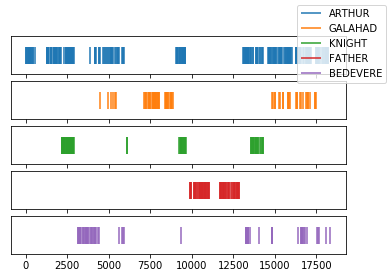

In [18]:
fig, axes = plt.subplots(5, sharex=True)

for ii, name in enumerate(names):
    axes[ii].eventplot(indexes[name], label=name, color="C{}".format(ii))
    axes[ii].get_yaxis().set_visible(False)

fig.legend()